<center>
    <img src="img/scikit-learn-logo.png" width="40%" />
    <br />
    <h1>Introduction au Machine Learning avec Scikit-Learn</h1>
</center>

## La stack data analysis avec Python  

- The __open source__ Python ecosystem provides __a standalone, versatile and powerful scientific working environment__, including: [NumPy](http://numpy.org), [SciPy](http://scipy.org), [IPython](http://ipython.org), [Matplotlib](http://matplotlib.org), [Pandas](http://pandas.pydata.org/), _and many others..._

<center> 
<img src="img/scikit-learn-logo.png" style="max-width: 120px; display: inline" />
<img src="img/numpy-logo.png" style="max-width: 120px; display: inline" />
<img src="img/scipy-logo.png" style="max-width: 120px; display: inline" />
<img src="img/ipython-logo.jpg" style="max-width: 120px; display: inline" />
<img src="img/matplotlib-logo.png" style="max-width: 120px; display: inline"/>
<img src="img/pandas-logo.png" style="max-width: 120px; display: inline" />
</center>

- Scikit-Learn builds upon NumPy and SciPy and __complements__ this scientific environment with machine learning algorithms;
- By design, Scikit-Learn is __non-intrusive__, easy to use and easy to combine with other libraries;
- Core algorithms are implemented in low-level languages.

## Overview of algorithm proposed by scikit-learn

__Supervised learning:__

* Linear models (Ridge, Lasso, Elastic Net, ...)
* Support Vector Machines
* Tree-based methods (Random Forests, Bagging, GBRT, ...)
* Nearest neighbors 
* Neural networks (basics)
* Gaussian Processes
* Feature selection

__Unsupervised learning:__

* Clustering (KMeans, Ward, ...)
* Matrix decomposition (PCA, ICA, ...)
* Density estimation
* Outlier detection

__Model selection and evaluation:__

* Cross-validation
* Grid-search
* Lots of metrics

_... and many more!_ (See our [Reference](http://scikit-learn.org/dev/modules/classes.html))

# Classification

## Framework

Data comes as a finite learning set ${\cal L} = (X, y)$ where
* Input samples are given as an array $X$ of shape `n_samples` $\times$ `n_features`, taking their values in ${\cal X}$;
* Output values are given as an array $y$, taking _symbolic_ values in ${\cal Y}$

The goal of supervised classification is to build an estimator $\varphi: {\cal X} \mapsto {\cal Y}$ minimizing

$$
Err(\varphi) = \mathbb{E}_{X,Y}\{ \ell(Y, \varphi(X)) \}
$$

where $\ell$ is a loss function, e.g., the zero-one loss for classification $\ell_{01}(Y,\hat{Y}) = 1(Y \neq \hat{Y})$.

# Regression 

## Framework

Data comes as a finite learning set ${\cal L} = (X, y)$ where
* Input samples are given as an array $X$ of shape `n_samples` $\times$ `n_features`, taking their values in ${\cal X}$;
* Output values are given as an array $y$, taking _numerical_ values in ${\cal Y}$

The goal of supervised regressor is to build an estimator $\varphi: {\cal X} \mapsto {\cal Y}$ minimizing

$$
Err(\varphi) = \mathbb{E}_{X,Y}\{ \ell(Y, \varphi(X)) \}
$$

where $\ell$ is a loss function, e.g., the zero-one loss for classification $\ell_{01}(Y,\hat{Y}) = 1(Y \neq \hat{Y})$.

## Applications

- Classifying signal from background events; 
- Diagnosing disease from symptoms;
- Recognising cats in pictures;
- Identifying body parts with Kinect cameras;
- ...
  

## Data 

- Input data = Numpy arrays or Scipy sparse matrices ;
- Algorithms are expressed using high-level operations defined on matrices or vectors (similar to MATLAB) ;
    - Leverage efficient low-leverage implementations ;
    - Keep code short and readable. 

## Loading external data

- Numpy nous permet de [simple tools](https://docs.scipy.org/doc/numpy/reference/routines.io.html) directment via un fichier (CSV, binary, etc); ie #np.load(file)

- Pour les données structuré, Pandas nous permet lui de load des fichiers comme [advanced tools](http://pandas.pydata.org/pandas-docs/stable/io.html) (CSV, JSON, Excel, HDF5, SQL, etc);

## Loading internal data
- Scikit-learn nous permet de load ou de génerer un dataset [tools]() sous la forme d'une matrice en numpy array  

# Plan du tutorial

* ## Load et inspecter un dataset via Sklearn 
* ## Procédure d'entrainement classique sur Sklearn
    * Cas d'étude avec le dataset MNIST et un SVM classifier
    * Cas d'étude avec le dataset: Iris et un MLP classifier
* ## Procédure de sélection d'un modèle sur Sklearn
    * Introduction à la validation croisée
    * Approches naives de selection d'hyper parametre vs recherche optimisé avec RandomizedSearchCV  


# Les imports requis pour le tutorial

In [3]:
import numpy as np
# Linear algebra
import scipy
# Standard scientific Python imports
import matplotlib
import matplotlib.pyplot as plt
import sklearn
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier


In [4]:
# Version lib

In [5]:
print(np.__version__)
print(sklearn.__version__)
print(matplotlib.__version__)
print(scipy.__version__)

1.18.1
0.22.1
3.1.3
1.4.1


# Load et inspecter un dataset via Sklearn 

In [6]:
dataset = datasets.load_boston()

In [11]:
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

### With the module dataset from sklearn we can load pre built dataset or even create one. The dataset loaded is a dictionnary that contain our data already pre-processed. The dictionnary do have the following information: 
    data : 
    target :
    features names :
    DESCR :
    filename :

In [37]:
dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [12]:
data = dataset.data
print(data)
data.shape

(506, 13)

In [14]:
target = dataset.target
print(target)
target.shape

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

(506,)

In [40]:
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

# Procédure d'entrainement classique sur Sklearn
### Avec le dataset MNIST

In [41]:
digits = datasets.load_digits()

In [42]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [43]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

In [44]:
# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

In [45]:
# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [46]:
# Now predict the value of the digit on the second half:
predicted = classifier.predict(X_test)

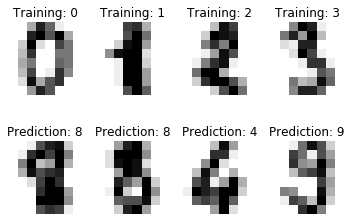

In [47]:
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)
    
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

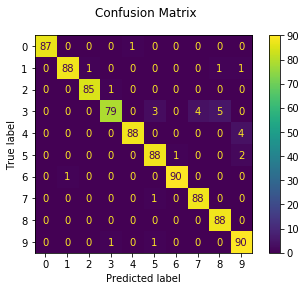

In [48]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

# Procédure d'entrainement classique sur Sklearn
### Avec le dataset Iris

In [49]:
iris_dataset = datasets.load_iris()

In [50]:
X=iris_dataset.data
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [51]:
y=iris_dataset.target
np.unique(y)


array([0, 1, 2])

In [52]:
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [53]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=27)

In [54]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,solver='sgd', verbose=10,  random_state=21,tol=0.000000001)

In [55]:
clf.fit(x_train, y_train)

Iteration 1, loss = 1.11995340
Iteration 2, loss = 1.10761638
Iteration 3, loss = 1.09029809
Iteration 4, loss = 1.06925268
Iteration 5, loss = 1.04668042
Iteration 6, loss = 1.02419155
Iteration 7, loss = 1.00266940
Iteration 8, loss = 0.98215738
Iteration 9, loss = 0.96305214
Iteration 10, loss = 0.94570841
Iteration 11, loss = 0.93007795
Iteration 12, loss = 0.91660410
Iteration 13, loss = 0.90519150
Iteration 14, loss = 0.89580798
Iteration 15, loss = 0.88810315
Iteration 16, loss = 0.88060401
Iteration 17, loss = 0.87281296
Iteration 18, loss = 0.86451399
Iteration 19, loss = 0.85572588
Iteration 20, loss = 0.84656042
Iteration 21, loss = 0.83725168
Iteration 22, loss = 0.82791447
Iteration 23, loss = 0.81853228
Iteration 24, loss = 0.80923289
Iteration 25, loss = 0.80001423
Iteration 26, loss = 0.79094461
Iteration 27, loss = 0.78199743
Iteration 28, loss = 0.77316176
Iteration 29, loss = 0.76431455
Iteration 30, loss = 0.75540286
Iteration 31, loss = 0.74632259
Iteration 32, los

Iteration 288, loss = 0.18644670
Iteration 289, loss = 0.18584309
Iteration 290, loss = 0.18524312
Iteration 291, loss = 0.18464676
Iteration 292, loss = 0.18405421
Iteration 293, loss = 0.18346564
Iteration 294, loss = 0.18288103
Iteration 295, loss = 0.18230027
Iteration 296, loss = 0.18172312
Iteration 297, loss = 0.18114965
Iteration 298, loss = 0.18057960
Iteration 299, loss = 0.18001306
Iteration 300, loss = 0.17944980
Iteration 301, loss = 0.17889018
Iteration 302, loss = 0.17833367
Iteration 303, loss = 0.17778027
Iteration 304, loss = 0.17722998
Iteration 305, loss = 0.17668303
Iteration 306, loss = 0.17613933
Iteration 307, loss = 0.17559822
Iteration 308, loss = 0.17506087
Iteration 309, loss = 0.17452638
Iteration 310, loss = 0.17399560
Iteration 311, loss = 0.17346885
Iteration 312, loss = 0.17294527
Iteration 313, loss = 0.17242508
Iteration 314, loss = 0.17190861
Iteration 315, loss = 0.17139528
Iteration 316, loss = 0.17088476
Iteration 317, loss = 0.17037747
Iteration 

C:\Users\youve\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=21, shuffle=True, solver='sgd',
              tol=1e-09, validation_fraction=0.1, verbose=10, warm_start=False)

In [56]:
y_pred = clf.predict(x_test)

In [57]:
y_pred

array([2, 0, 2, 2, 1, 1, 1, 2, 1, 0, 1, 2, 0, 1, 1, 1, 0, 2, 2, 2, 1, 0,
       1, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 1, 1, 0, 1, 2])

In [58]:
metrics.accuracy_score(y_test, y_pred)

1.0

In [59]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[ 9,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 15]], dtype=int64)

Classification report for classifier MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=21, shuffle=True, solver='sgd',
              tol=1e-09, validation_fraction=0.1, verbose=10, warm_start=False):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        15

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38


Confusion matrix:
[[ 9  0  0]
 [ 0 14  0]
 [ 0  0 15]]


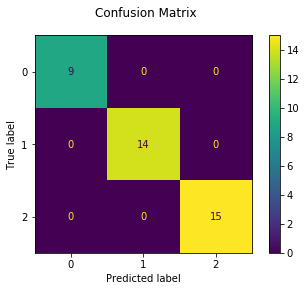

In [60]:
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(y_test, y_pred)))
disp = metrics.plot_confusion_matrix(clf, x_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

# Procédure de sélection d'un modèle sur Sklearn
<center>
    <img src="img/Cross_val.png" width="80%" />
    <br />
    <h2>Introduction à la validation croisée</h2>
</center>

In [61]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
score=metrics.accuracy_score(y_test, y_pred)
score

0.9473684210526315

In [62]:
from sklearn.model_selection import KFold

scores = []

for train, test in KFold(n_splits=5, random_state=42).split(X):
    X_train, y_train = X[train], y[train]
    X_test, y_test = X[test], y[test]
    clf = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
    scores.append(metrics.accuracy_score(y_test, clf.predict(X_test)))

print("CV accuracy = %f +-%f" % (np.mean(scores), np.std(scores)))

CV accuracy = 0.913333 +-0.083267


C:\Users\youve\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [63]:
# Shortcut
from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), X, y, 
                         cv=KFold(n_splits=5, random_state=42), 
                         scoring="accuracy")
print("CV accuracy = %f +-%f" % (np.mean(scores), np.std(scores)))

CV accuracy = 0.913333 +-0.083267


C:\Users\youve\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


# Approches naives de selection d'hyper parametre vs recherche optimisé avec RandomizedSearchCV  

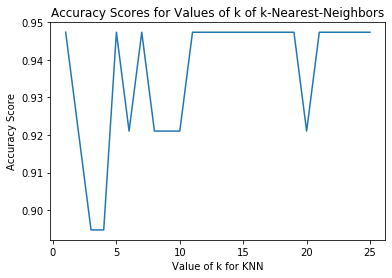

In [64]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=27)
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
# define the parameter values that should be searched
# for python 2, k_range = range(1, 31)
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [67]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range,)
print(param_grid)



{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [68]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [69]:
grid.fit(X, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=25, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [70]:
grid.cv_results_

{'mean_fit_time': array([0.00099452, 0.00070009, 0.00039942, 0.00069926, 0.00069835,
        0.00059881, 0.00059905, 0.00040033, 0.0003973 , 0.0004976 ,
        0.00039744, 0.00039899, 0.00039616, 0.00060153, 0.0003993 ,
        0.00079796, 0.00069664, 0.00089951, 0.00069792, 0.00029941,
        0.000598  , 0.00050006, 0.00019984, 0.0006989 , 0.00029914,
        0.0003984 , 0.00020113, 0.00029922, 0.00029764, 0.00029793]),
 'std_fit_time': array([0.00044638, 0.00045833, 0.0004892 , 0.00045779, 0.00045719,
        0.00048893, 0.00048913, 0.00049032, 0.00048662, 0.00066871,
        0.00048679, 0.00048867, 0.00048522, 0.00049119, 0.00048905,
        0.00039899, 0.00045607, 0.00030004, 0.00045692, 0.00045735,
        0.00048827, 0.00050009, 0.00039969, 0.00045756, 0.00045695,
        0.00048794, 0.00040227, 0.00045706, 0.00045467, 0.00045511]),
 'mean_score_time': array([0.00179901, 0.00149355, 0.00119662, 0.00129526, 0.00109866,
        0.00119593, 0.00119841, 0.0011929 , 0.00129979, 0.00

In [73]:
grid.best_index_

12